In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("C:\\Users\\sanka\\Desktop\\JPMorganVirtualinternship\\Nat_Gas.csv")

In [18]:
df.head(10)

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [19]:
df.shape[0]

48

In [20]:
df.dtypes

Dates      object
Prices    float64
dtype: object

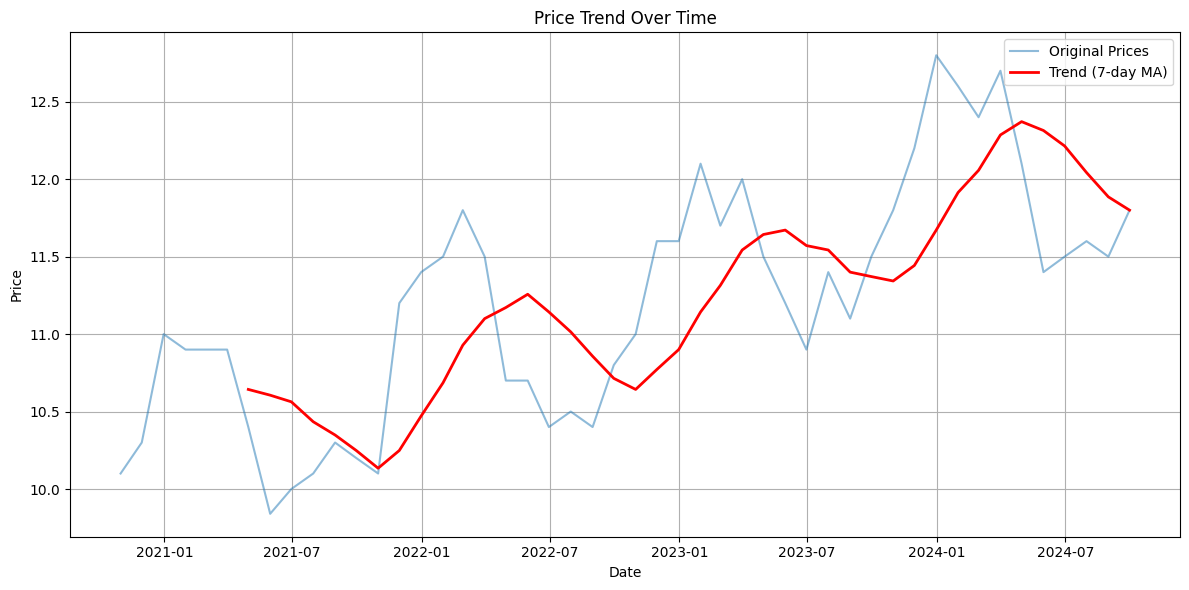

In [21]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.set_index('Dates', inplace=True)
df['Trend'] = df['Prices'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Original Prices', alpha=0.5)
plt.plot(df.index, df['Trend'], label='Trend (7-day MA)', color='red', linewidth=2)
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df

,Prices,Trend
Dates,,
2020-10-31,10.10,NaN
2020-11-30,10.30,NaN
2020-12-31,11.00,NaN
2021-01-31,10.90,NaN
2021-02-28,10.90,NaN
2021-03-31,10.90,NaN
2021-04-30,10.40,10.642857
2021-05-31,9.84,10.605714
2021-06-30,10.00,10.562857


10:37:54 - cmdstanpy - INFO - Chain [1] start processing
10:37:54 - cmdstanpy - INFO - Chain [1] done processing


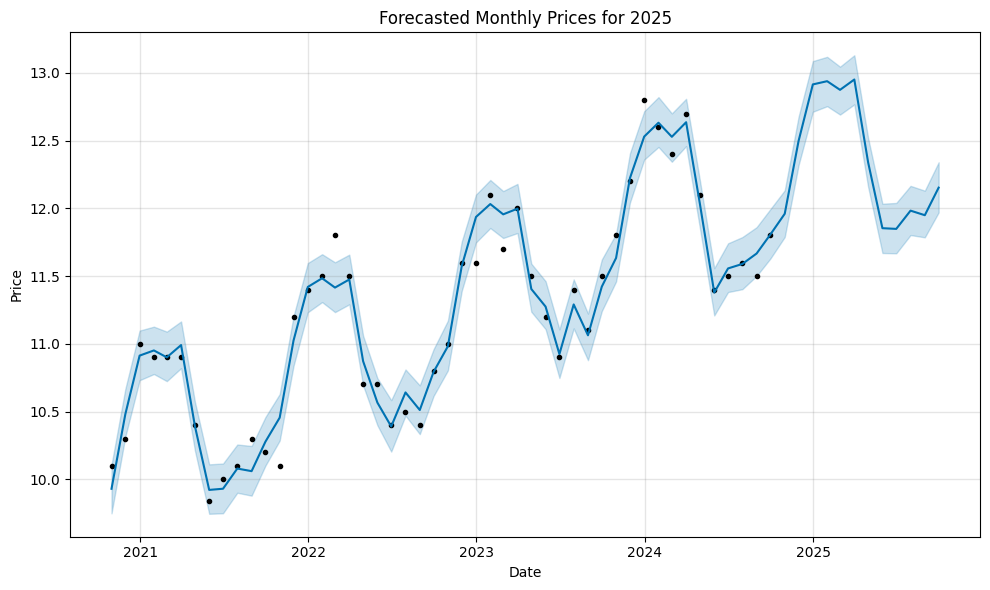

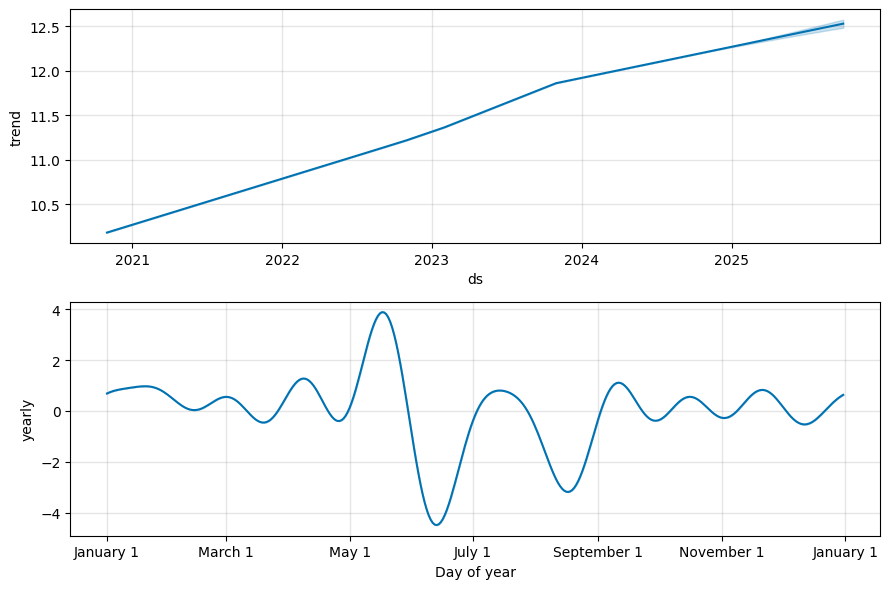

           ds       yhat  yhat_lower  yhat_upper
51 2025-01-31  12.939215   12.754539   13.119143
52 2025-02-28  12.875286   12.692529   13.046371
53 2025-03-31  12.951613   12.767939   13.130655
54 2025-04-30  12.339306   12.158244   12.518724
55 2025-05-31  11.853801   11.670471   12.034472
56 2025-06-30  11.848579   11.668163   12.040095
57 2025-07-31  11.983327   11.803020   12.166282
58 2025-08-31  11.949657   11.786234   12.130937
59 2025-09-30  12.153211   11.970140   12.340461


In [23]:
from prophet import Prophet
df_reset = df.reset_index()[['Dates', 'Prices']]
df_reset.columns = ['ds', 'y']
model = Prophet()
model.fit(df_reset)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)
model.plot(forecast)
plt.title('Forecasted Monthly Prices for 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()
model.plot_components(forecast)
plt.tight_layout()
plt.show()
forecast_2025 = forecast[(forecast['ds'].dt.year == 2025)][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast_2025)

In [10]:
from datetime import datetime
user_input = input("Enter a date in YYYY-MM-DD format: ")
try:
    user_date = pd.to_datetime(user_input)
    result = forecast[forecast['ds'] == user_date]
    if not result.empty:
        yhat = result.iloc[0]['yhat']
        lower = result.iloc[0]['yhat_lower']
        upper = result.iloc[0]['yhat_upper']
        print(f"\nForecast for {user_date.date()}:")
        print(f"Predicted value (yhat): {yhat:.2f}")
        print(f"Confidence interval: [{lower:.2f}, {upper:.2f}]")
    else:
        print("The date is not in the forecast range. Try a different date.")
except ValueError:
    print("Invalid date format. Please enter the date as YYYY-MM-DD.")


Enter a date in YYYY-MM-DD format:  2025-03-31



Forecast for 2025-03-31:
Predicted value (yhat): 12.95
Confidence interval: [12.79, 13.13]


In [12]:
forecast_2025 = forecast[(forecast['ds'].dt.year == 2025)][['ds', 'yhat']]
forecast_2025.columns = ['Dates', 'Forecast']
df_orig = df.copy().reset_index()
df_orig['Forecast'] = float('nan')
combined_df = pd.concat([df_orig, forecast_2025], ignore_index=True)
combined_df.to_csv('forecasted_prices_2025.csv', index=False)

In [14]:
df_new=pd.read_csv("C:\\Users\\sanka\\Desktop\\JPMorganVirtualinternship\\forecasted_prices_2025.csv")

In [15]:
df_new

,Dates,Prices,Trend,Forecast
0,2020-10-31,10.10,NaN,NaN
1,2020-11-30,10.30,NaN,NaN
2,2020-12-31,11.00,NaN,NaN
3,2021-01-31,10.90,NaN,NaN
4,2021-02-28,10.90,NaN,NaN
5,2021-03-31,10.90,NaN,NaN
6,2021-04-30,10.40,10.642857,NaN
7,2021-05-31,9.84,10.605714,NaN
8,2021-06-30,10.00,10.562857,NaN
9,2021-07-31,10.10,10.434286,NaN
